In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, confusion_matrix, precision_score, ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler


import warnings
warnings.filterwarnings('ignore')

import pickle

- Loan_ID: A unique loan ID.
- Gender: Either male or female.
- Married: Weather Married(yes) or Not Marttied(No).
- Dependents: Number of persons depending on the client.
- Education: Applicant Education(Graduate or Undergraduate).
- Self_Employed: Self-employed (Yes/No).
- ApplicantIncome: Applicant income.
- CoapplicantIncome: Co-applicant income.
- LoanAmount: Loan amount in thousands.
- Loan_Amount_Term: Terms of the loan in months.
- Credit_History: Credit history meets guidelines.
- Property_Area: Applicants are living either Urban, Semi-Urban or Rural.
- Loan_Status: Loan approved (Y/N).

In [2]:
df = pd.read_csv('loan_data_1.csv', index_col=0)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.0,360.0,1.0,Urban,Y


In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,369.000000,363.000000,373.000000,370.000000,351.000000
mean,3563.422764,1267.005289,104.914209,340.864865,0.837607
std,1427.371257,2388.048316,28.484822,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2583.000000,0.000000,90.000000,360.000000,1.000000
50%,3326.000000,830.000000,110.000000,360.000000,1.000000
75%,4226.000000,2008.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [4]:
df['LoanAmount'] = df['LoanAmount']*1000
df['ApplicantIncome'] = df['ApplicantIncome']*100

### Data Cleansing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          375 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    369 non-null    float64
 7   CoapplicantIncome  363 non-null    float64
 8   LoanAmount         373 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(5), object(8)
memory usage: 41.7+ KB


In [6]:
df['Gender'].fillna('Unknown', inplace=True)
df['Dependents'].fillna(0, inplace=True)
df['Education'].fillna('Unknown', inplace=True)
df['Self_Employed'].fillna('No', inplace=True)
df['ApplicantIncome'].fillna(df['ApplicantIncome'].median(), inplace=True)
df['CoapplicantIncome'].fillna(df['CoapplicantIncome'].median(), inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)
df['Credit_History'].fillna(0, inplace=True)

In [7]:
df.loc[df['Dependents']=='3+', 'Dependents'] = 3

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             381 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         381 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      381 non-null    object 
 6   ApplicantIncome    381 non-null    float64
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   381 non-null    float64
 10  Credit_History     381 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(5), object(8)
memory usage: 41.7+ KB


### Plots

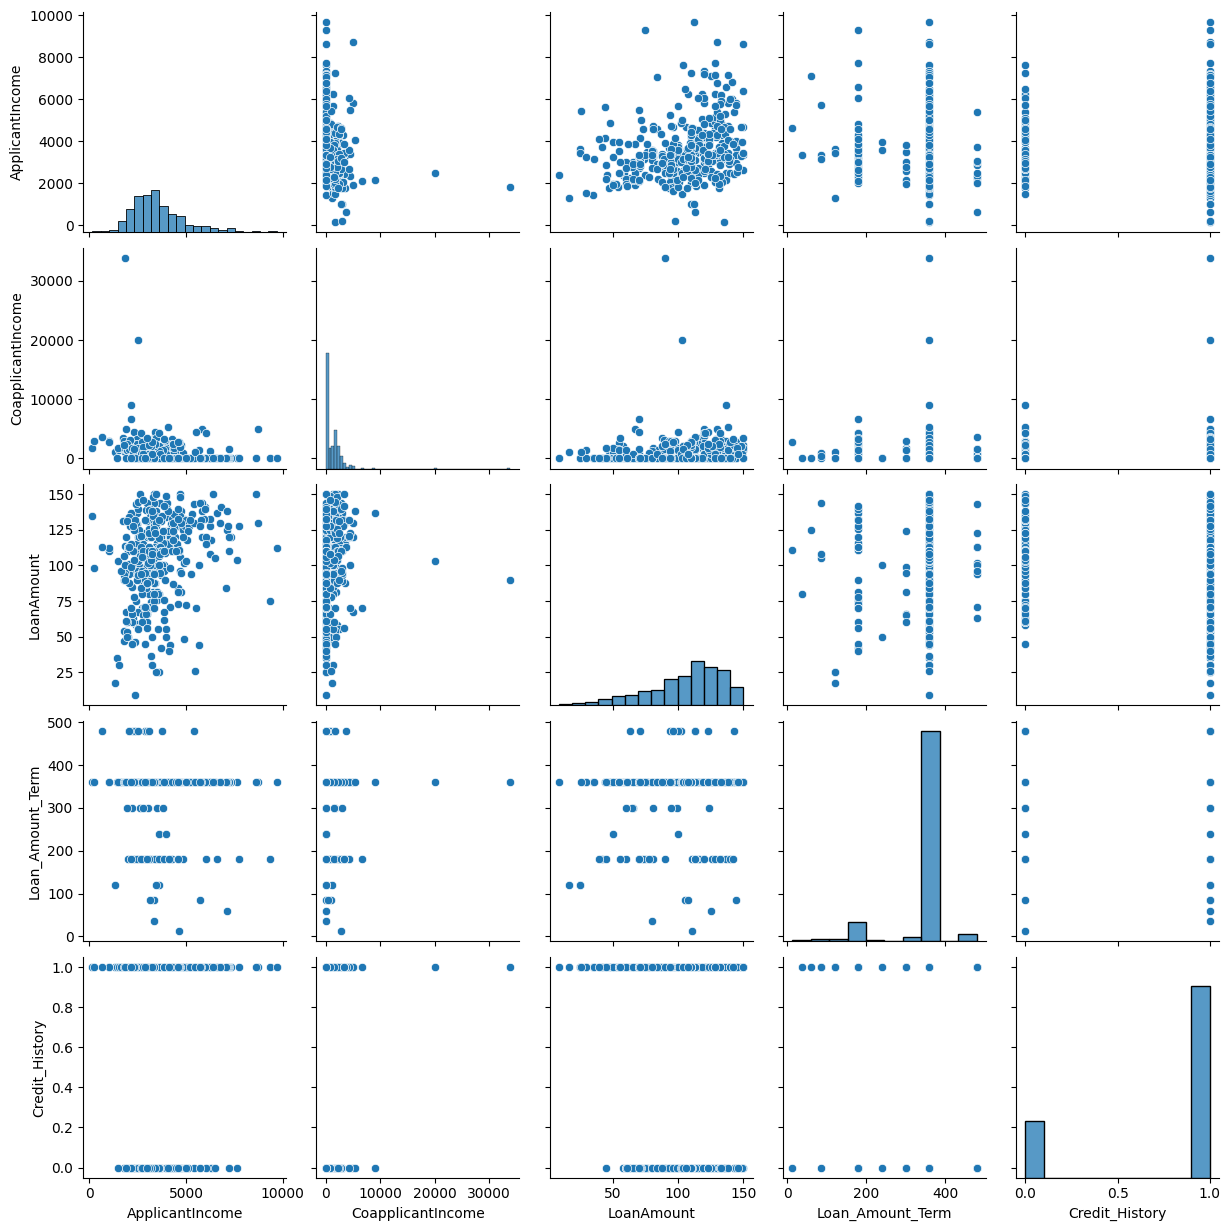

In [13]:
sns.pairplot(data=df)
plt.show()

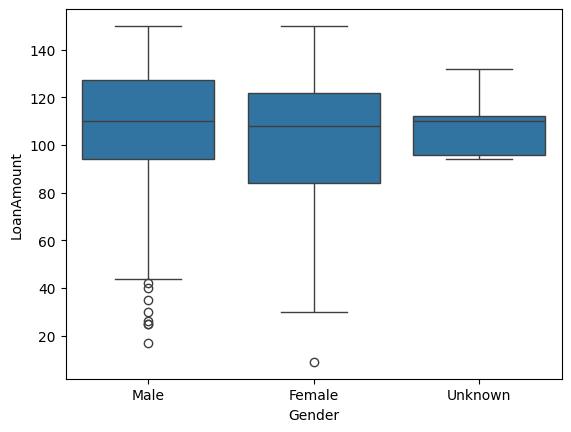

In [14]:
sns.boxplot(data=df, x='Gender', y='LoanAmount')
plt.show()

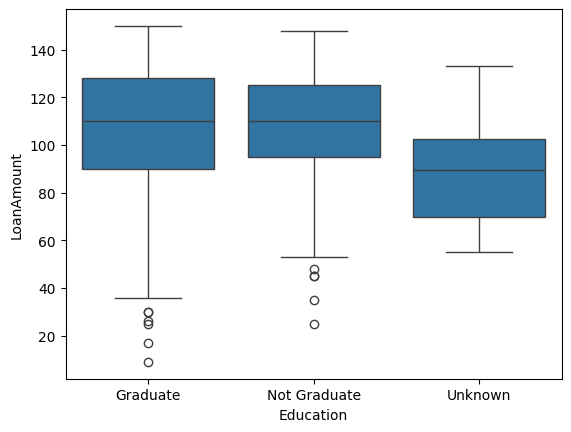

In [15]:
sns.boxplot(data=df, x='Education', y='LoanAmount')
plt.show()

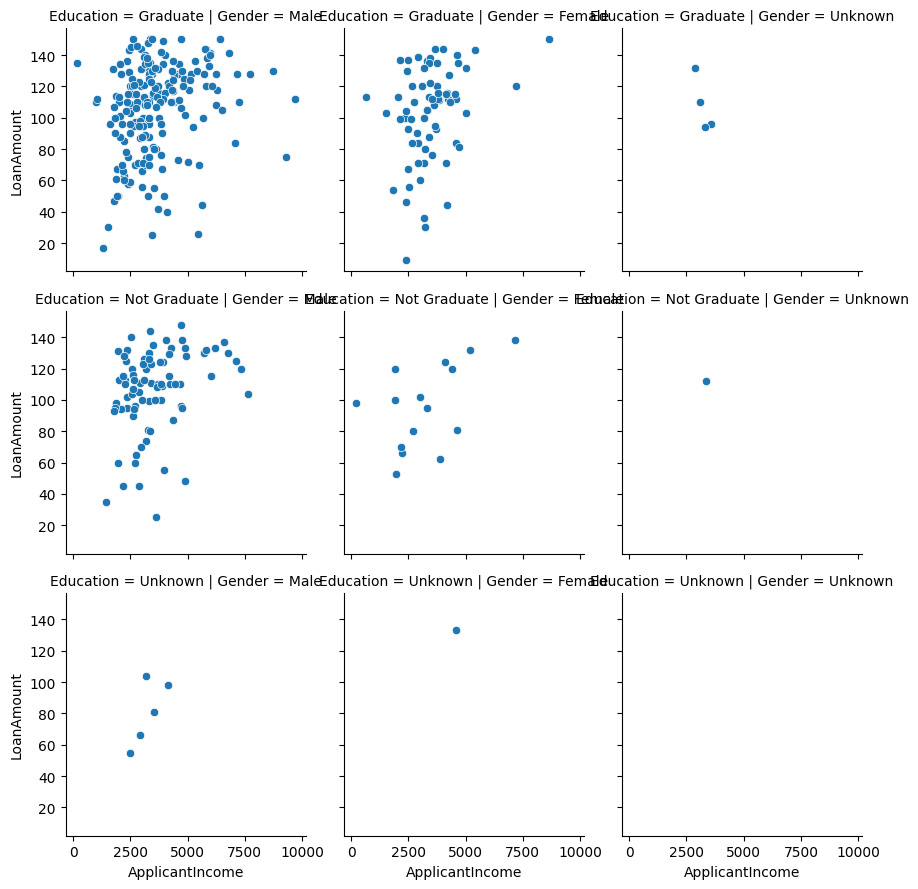

In [16]:
g = sns.FacetGrid(data=df, col='Gender', row='Education')
g.map(sns.scatterplot,'ApplicantIncome', 'LoanAmount')
plt.show()

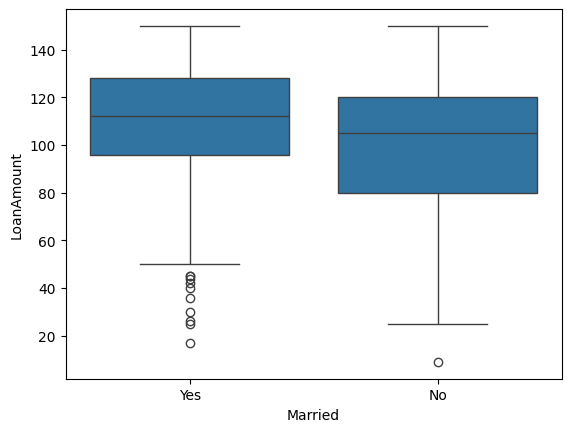

In [17]:
sns.boxplot(data=df, x='Married', y='LoanAmount')
plt.show()

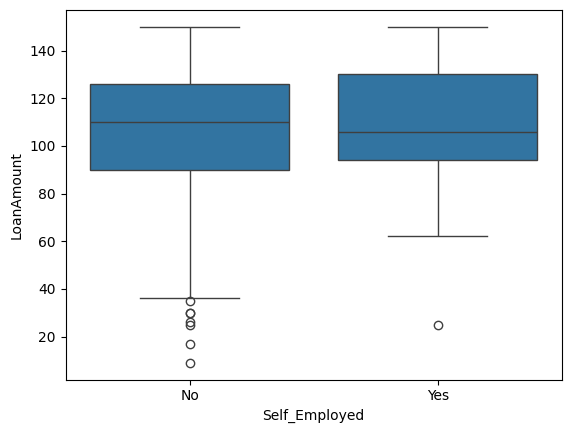

In [18]:
sns.boxplot(data=df, x='Self_Employed', y='LoanAmount')
plt.show()

### Naive Bayes

In [9]:
#preprocessing
features = df.drop(columns=['Loan_ID', 'Loan_Status'])
target = df['Loan_Status']

features

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,1,Graduate,No,458300.0,1508.0,128000.0,360.0,1.0,Rural
1,Male,Yes,0,Graduate,Yes,300000.0,0.0,66000.0,360.0,1.0,Urban
2,Male,Yes,0,Not Graduate,No,258300.0,2358.0,120000.0,360.0,1.0,Urban
3,Male,No,0,Graduate,No,600000.0,0.0,141000.0,360.0,1.0,Urban
4,Male,Yes,0,Not Graduate,No,233300.0,1516.0,95000.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
376,Male,Yes,3,Graduate,No,570300.0,0.0,128000.0,360.0,1.0,Urban
377,Male,Yes,0,Graduate,No,323200.0,830.0,108000.0,360.0,1.0,Rural
378,Female,No,0,Graduate,No,290000.0,0.0,71000.0,360.0,1.0,Rural
379,Male,Yes,3,Graduate,No,410600.0,0.0,40000.0,180.0,1.0,Rural


In [10]:
#encode categorical features and target
feature_encoder = OneHotEncoder(sparse_output=False)
encoded = feature_encoder.fit_transform(features[['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']])

encoded_features = pd.DataFrame(encoded, columns=feature_encoder.get_feature_names_out())
encoded_features

,Gender_Female,Gender_Male,Gender_Unknown,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Education_Unknown,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
377,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
378,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
379,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [11]:
#standard scalar
scalar = StandardScaler()
scaled = scalar.fit_transform(features.drop(columns=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents', 'Credit_History']))
scaled_features = pd.DataFrame(scaled, columns=scalar.get_feature_names_out())
scaled_features

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.731822,0.112312,0.816137,0.275147
1,-0.396135,-0.535013,-1.385895,0.275147
2,-0.693266,0.477183,0.532004,0.275147
3,1.741498,-0.535013,1.277853,0.275147
4,-0.871403,0.115746,-0.355912,0.275147
...,...,...,...,...
376,1.529872,-0.535013,0.816137,0.275147
377,-0.230825,-0.178727,0.105804,0.275147
378,-0.467390,-0.535013,-1.208311,0.275147
379,0.391939,-0.535013,-2.309327,-2.390052


In [12]:
X = pd.concat([features[['Dependents', 'Credit_History']], encoded_features, scaled_features], axis=1)
X

,Dependents,Credit_History,Gender_Female,Gender_Male,Gender_Unknown,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Education_Unknown,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.731822,0.112312,0.816137,0.275147
1,0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.396135,-0.535013,-1.385895,0.275147
2,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.693266,0.477183,0.532004,0.275147
3,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.741498,-0.535013,1.277853,0.275147
4,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.871403,0.115746,-0.355912,0.275147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.529872,-0.535013,0.816137,0.275147
377,0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.230825,-0.178727,0.105804,0.275147
378,0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.467390,-0.535013,-1.208311,0.275147
379,3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.391939,-0.535013,-2.309327,-2.390052


In [13]:
target_encoder = LabelEncoder()
tencoded = target_encoder.fit_transform(target)

encoded_target = pd.DataFrame(tencoded, columns=['Loan_Status'])
y = encoded_target['Loan_Status']
y

0      0
1      1
2      1
3      1
4      1
      ..
376    1
377    1
378    1
379    1
380    0
Name: Loan_Status, Length: 381, dtype: int32

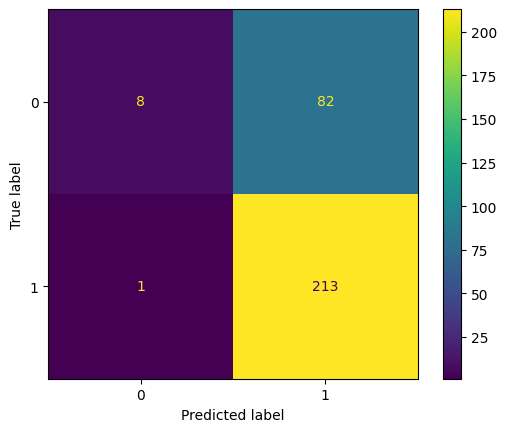

In [14]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#model
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_train)

cm = confusion_matrix(y_train, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)
disp.plot()
plt.show()

In [15]:
np.mean(y_pred == y_train)

0.7269736842105263

In [16]:
accuracy = accuracy_score(y_train, y_pred)
print(accuracy)

0.7269736842105263


In [17]:
fscore = f1_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
print(f'F1 Score: {fscore}, Precision: {precision}')

F1 Score: 0.8369351669941061, Precision: 0.7220338983050848


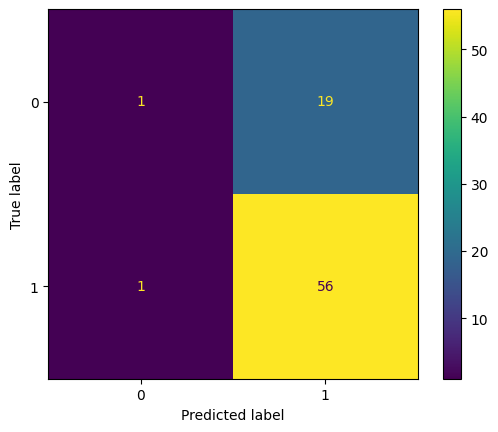

In [18]:
y_pred_test = nb.predict(X_test)

cm_test = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=nb.classes_)
disp.plot()
plt.show()

In [19]:
fscore_test = f1_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'F1 Score: {fscore_test}, Precision: {precision_test}, Accuracy: {accuracy_test}')

F1 Score: 0.8484848484848485, Precision: 0.7466666666666667, Accuracy: 0.7402597402597403


### K-fold Cross Validation

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, random_state=1, shuffle=True)
accuracies=cross_val_score(estimator=nb,X=X,y=y,cv=cv, scoring='accuracy')
print(accuracies)
print("average accuracy :",np.mean(accuracies))
print("average std :",np.std(accuracies))

[0.8974359  0.73684211 0.73684211 0.71052632 0.71052632 0.60526316
 0.60526316 0.78947368 0.81578947 0.65789474]
average accuracy : 0.7265856950067476
average std : 0.08716935468790908


### save model and encoders

In [21]:
with open('feature_encoder.pkl', 'wb') as file:
    pickle.dump(feature_encoder, file)

with open('scalar.pkl', 'wb') as file:
    pickle.dump(scalar, file)

with open('target_encoder.pkl', 'wb') as file:
    pickle.dump(target_encoder, file)

with open('nb_model.pkl', 'wb') as file:
    pickle.dump(nb, file)

In [ ]:
# with open('feature_encoder.pkl', 'rb') as file:
#     feature_encoder = pickle.load(file)

# with open('scalar.pkl', 'rb') as file:
#     scalar = pickle.load(file)

# with open('target_encoder.pkl', 'rb') as file:
#     target_encoder = pickle.load(file)

# with open('nb_model.pkl', 'rb') as file:
#     nb = pickle.load(file)